In [1]:
import pandas as pd

# Loading train/val data
trainval_df = pd.read_csv("Mnist_Train.csv", header=None)

# Loading test data
test_df = pd.read_csv("Mnist_Test.csv", header=None)

In [2]:
print("Train/val nulls: ", trainval_df.isnull().sum().sum())
print("Test nulls:      ", test_df.isnull().sum().sum())

Train/val nulls:  0
Test nulls:       0


In [3]:
import cv2

In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
from keras.datasets import mnist

# Loading the MNIST Dataset

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
print(x_train.shape)

(60000, 28, 28)


In [8]:
import numpy as np

In [ ]:
# Displaying 6 random images using opencv

for i in range(0,6):
    random_num=np.random.randint(0,len(x_train))
    img=x_train[random_num]
    window_name='Random Sample #' + str(i)
    cv2.imshow(window_name,img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()
                                 

In [9]:
import numpy as np

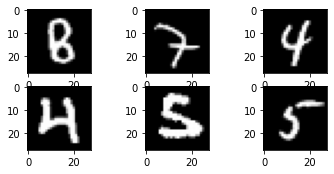

In [10]:
import matplotlib.pyplot as plt
plt.subplot(331)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.show()

In [11]:
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /=255
x_test /=255

print('x_train shape:',x_train.shape)
print(x_train.shape[0], 'train_samples')
print(x_test.shape[0], 'test_samples')


x_train shape: (60000, 28, 28, 1)
60000 train_samples
10000 test_samples


## One Hot Encoding of Labels

In [12]:
from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

print("Number of Classes: " + str(y_test.shape[1]))

num_classes=y_test.shape[1]
num_pixels=x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Creating our model

In [14]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics =['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

## Plotting our model

In [15]:
from tensorflow.keras.utils import plot_model

In [16]:
import tensorflow as tf

In [22]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
tf.keras.utils.plot_model(model,to_file="model_png")

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [18]:
batch_size=32
epochs=10
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 153s 67ms/step - loss: 0.9700 - accuracy: 0.6857 - val_loss: 0.2146 - val_accuracy: 0.9354
Epoch 2/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.3167 - accuracy: 0.9044 - val_loss: 0.1363 - val_accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.2248 - accuracy: 0.9323 - val_loss: 0.1018 - val_accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.1785 - accuracy: 0.9468 - val_loss: 0.0799 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 136s 73ms/step - loss: 0.1428 - accuracy: 0.9579 - val_loss: 0.0656 - val_accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.1217 - accuracy: 0.9634 - val_loss: 0.0585 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.1075 - accuracy: 0.9669 - val_loss: 0

In [19]:
score = model.evaluate(x_test,y_test,verbose=0)

In [20]:
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.04199641942977905
Test accuracy: 0.9860000014305115


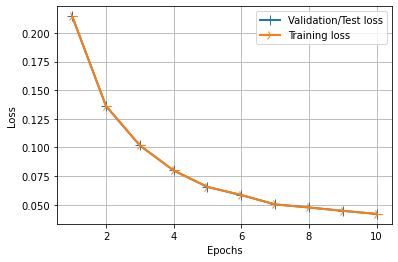

In [21]:
import matplotlib.pyplot as plt
history_dict=history.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test loss')
line2=plt.plot(epochs,val_loss_values,label='Training loss')
plt.setp(line1, linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2, linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
history.history

{'loss': [0.5923970341682434,
  0.2913459837436676,
  0.21579724550247192,
  0.1683855652809143,
  0.14009255170822144,
  0.118533656001091,
  0.1061718612909317,
  0.09800183773040771,
  0.08681740611791611,
  0.07896637171506882],
 'accuracy': [0.8142666816711426,
  0.9116500020027161,
  0.9358166456222534,
  0.9503499865531921,
  0.9582499861717224,
  0.9644333124160767,
  0.9680500030517578,
  0.9696166515350342,
  0.974399983882904,
  0.9765333533287048],
 'val_loss': [0.21459853649139404,
  0.13625982403755188,
  0.10180554538965225,
  0.07992947101593018,
  0.06556102633476257,
  0.05848057195544243,
  0.05031134560704231,
  0.04762765020132065,
  0.04468398913741112,
  0.04199641942977905],
 'val_accuracy': [0.9354000091552734,
  0.9591000080108643,
  0.9696000218391418,
  0.9760000109672546,
  0.9796000123023987,
  0.9812999963760376,
  0.9840999841690063,
  0.9842000007629395,
  0.9850000143051147,
  0.9860000014305115]}

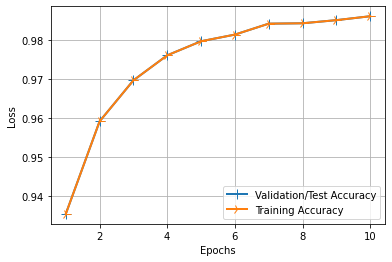

In [24]:
import matplotlib.pyplot as plt
history_dict=history.history

loss_values=history_dict['accuracy']
val_loss_values=history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Accuracy')
line2=plt.plot(epochs,val_loss_values,label='Training Accuracy')
plt.setp(line1, linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2, linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## Saving our model

In [26]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


## Loading Model

In [27]:
from keras.models import load_model
classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

In [30]:
# Input test data to the classifier

def draw_test(name,prod,input_im):
    BLACK = [0,0,0]
    expanded_image=cv2.copyMakeBorder(input_im,0,0,0,imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image=cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(152,70),cv2.FONT_HERSHEY_COMPLEX_SMALL,4,(0,255,0),2)
    cv2.imshow(name,expanded_image)
    
    for i in range(0,10):
        rand=np.random.randint(0,len(x_test))
        input_im=x_test[rand]
        
        imageL = cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
        input_im=input_im.reshape(1,28,28,1)
        
        # Prediction
        
        res=str(classifier.predict_classes(input_im,1,verbose=0)[0])
        draw_test("Prediction",res,imageL)
        cv2.waitKey(0)
        
    cv2.destroyAllWindows()

